In [1]:
# import ragas.metrics as m
import os
from dotenv import load_dotenv
import pandas as pd
from src.generator import RAGKGGenerator
from src.llms import OpenAIModel, HuggingFaceLLM
# from langchain_openai import ChatOpenAI, OpenAIEmbeddings
# from ragas.llms import LangchainLLMWrapper
# from ragas.embeddings import LangchainEmbeddingsWrapper

load_dotenv()
link = os.getenv('dsa_2214')
token = os.getenv('OPENAI_API_KEY')
os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN') 
os.environ['OPENAI_API_KEY'] = token

chapters = [
    'Data Structures and Algorithms',
    'Mathematical Preliminaries',
    'Algorithm Analysis',
    'Lists, Stacks, and Queues',
    'Binary Trees',
    'Non-Binary Trees',
    'Internal Sorting',
    'File Processing and External Sorting',
    'Searching',
    'Indexing',
    'Graphs',
    'Lists and Arrays Revisited',
    'Advanced Tree Structures',
    'Analysis Techniques',
    'Lower Bounds',
    'Patterns of Algorithms',
    'Limits to Computation',
]

/home/zanehutchens/uncc/research/rag/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/zanehutchens/uncc/research/rag/env/lib/python3.10/site-packages/pydantic/_internal/_config.py:295: PydanticDeprecatedSince20: Support for class-based `config` is deprecated, use ConfigDict instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  warnings.warn(DEPRECATION_MESSAGE, DeprecationWarning)
/home/zanehutchens/uncc/research/rag/env/lib/python3.10/site-packages/deepeval/__init__.py:52: UserWarning: You are using deepeval version 2.2.6, however version 2.3.6 is available. You should consider upgrading via the "pip install --upgrade deepeval" command.
  warnings.warn(


In [ ]:
# data = pd.read_csv('data/sorting.csv')
# data.columns = ['concept', 'outcome']
data = pd.read_csv('data/dsa_clifford_a_shaffer_3_2_java.csv')
data

In [ ]:
actual_concepts = data['concepts'][3].split('::')
actual_concepts

In [ ]:
extractor = RAGKGGenerator(
        [chapters[3]],
        300,
        100,
        OpenAIModel(),
        link,
)

In [ ]:
from src.metrics import SemanticSimilarity, Contextual_F1, AnswerCorrectness
from deepeval.metrics import AnswerRelevancyMetric, ContextualPrecisionMetric, ContextualRecallMetric, FaithfulnessMetric, ContextualRelevancyMetric


metrics = [AnswerRelevancyMetric(model = extractor.llm), AnswerCorrectness(model = extractor.llm), FaithfulnessMetric(model = extractor.llm), ContextualPrecisionMetric(model = extractor.llm), ContextualRecallMetric(model = extractor.llm), SemanticSimilarity(st_model = extractor.embedding_model)]

In [ ]:
# for i in range(5):
extractor.identify_concepts(5)
result = extractor.evaluate('concepts', 10, actual_concepts, metrics)
# print('-' * 20)
# print(f'OPENAI MODEL: {extractor.llm.get_model_name()}')
# print(f'TEMPERATURE: {extractor.llm.temperature}')
# print(f'SENTENCE TRANSFORMER: {extractor.embedding_model}')
# print(f'TEXTBOOK: dsa_2214')
# print(f'CHAPTERS TESTED: {extractor.chapters}')
# print('-' * 20)
# for i in result:
#     print(f"METRIC: {i['name']} ----> SCORE: {i['score']}")
#     print()
#     print(f"REASON: {i['reason']}")
#     print() 
#     print(f"QUERY: {i['input']}")
#     print()
#     print(f"OUTPUT: {i['output']}")
#     print('-' * 20)

In [ ]:
full_extractor = RAGKGGenerator(
    chapters, 
    500, 
    100, 
    OpenAIModel(),
    link
)

In [ ]:
full_extractor.identify_concepts(10)
# full_extractor.identify_key_terms(5)
# full_extractor.identify_outcomes(5)

In [ ]:
full_extractor.identify_dependencies(full_extractor.key_terms) 

In [ ]:
full_extractor.build_knowledge_graph()

In [ ]:
full_extractor.draw_knowledge_graph()

In [ ]:
full_extractor.build_terminology()

In [ ]:
full_extractor.draw_hierarchy()

In [ ]:
full_extractor.terminology

In [ ]:
from src.retrieval import RetrievalSystem
from langchain_openai import ChatOpenAI

In [ ]:
rs = RetrievalSystem(link, 700, 50, 'msmarco-distilbert-base-tas-b')

In [ ]:
results = rs.pipeline('What is the limits of computation chapter about?', ChatOpenAI(), 4, 10)
results

In [ ]:
ChatOpenAI(model = 'gpt-4o-mini', temperature = 0).invoke(f"Identify 5 key terms from chapter Limits to Computation. The textbook is here: {link}")

In [ ]:
rs.pipeline('Turing Machine, Decidability, Halting Problem, Intractability', ChatOpenAI())

In [ ]:
response = ChatOpenAI(model = 'gpt-4o-mini', temperature = 0).invoke('Provide 5 questions for the topics of Limits of Computation. These should be relatively simple questions. Provide your response as a list of questions.')
response.content

In [ ]:
rs.pipeline('Lists, Stacks, and Queues', ChatOpenAI(model = 'gpt-4o'))

In [2]:
hadoop_chapters = [
    'Meet Hadoop',
    'MapReduce',
    'The Hadoop Distributed Filesystem',
    'YARN',
    'Hadoop I/O',
    'Developing a MapReduce Application',
    'How MapReduce Works',
    'MapReduce Types and Formats',
    'MapReduce Features',
    'Setting up a Hadoop Cluster',
    'Administering Hadoop',
    'Avro',
    'Parquet',
    'Flume',
    'Sqoop',
    'Pig',
    'Hive',
    'Crunch',
    'Spark',
    'HBase',
    'Zookeeper',
    'Composable Data at Cerner',
    'Biological Data Science: Saving Lives with Software.',
    'Cascading'
]

hadoop_extractor = RAGKGGenerator(
    hadoop_chapters,
    500,
    100,
    OpenAIModel(),
    os.getenv('hadoop'),
    'data/Syllabus for 202380-Fall 2023-ITCS-3190-001-Cloud Comp for Data Analysis.pdf'
)

/home/zanehutchens/uncc/research/rag/src/extractor.py:55: LangChainDeprecationWarning: The class `UnstructuredFileLoader` was deprecated in LangChain 0.2.8 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-unstructured package and should be used instead. To use it run `pip install -U :class:`~langchain-unstructured` and import as `from :class:`~langchain_unstructured import UnstructuredLoader``.
  self.syllabus = UnstructuredFileLoader(syllabus).load()
Created a chunk of size 681, which is longer than the specified 500
Created a chunk of size 684, which is longer than the specified 500
Created a chunk of size 564, which is longer than the specified 500
Created a chunk of size 622, which is longer than the specified 500
Created a chunk of size 596, which is longer than the specified 500
Created a chunk of size 572, which is longer than the specified 500
Created a chunk of size 528, which is longer than the specified 500
Created a chunk of size 

In [3]:
# clusters, is_a_relationships, topic_objectives, syllabus_objectives, main_topics = hadoop_extractor.syllabus_pipline()
kg = hadoop_extractor.syllabus_pipline()

In [ ]:
hadoop_extractor.clusters

In [ ]:
hadoop_extractor.draw_knowledge_graph(kg, './visualizations/syllabus_hadoop_kg.html')

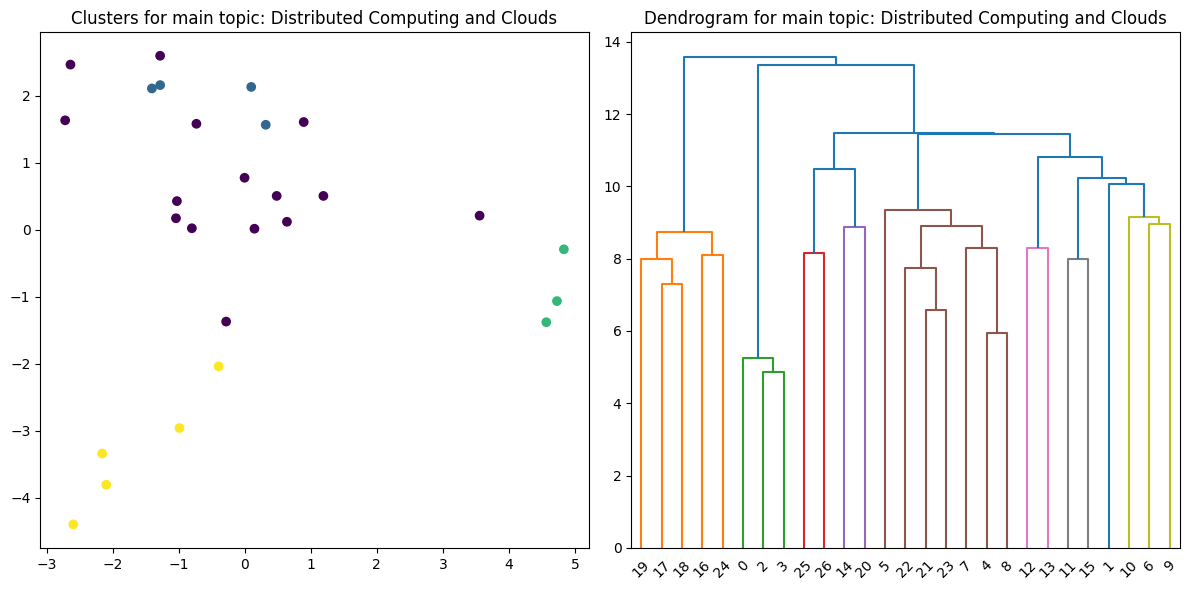

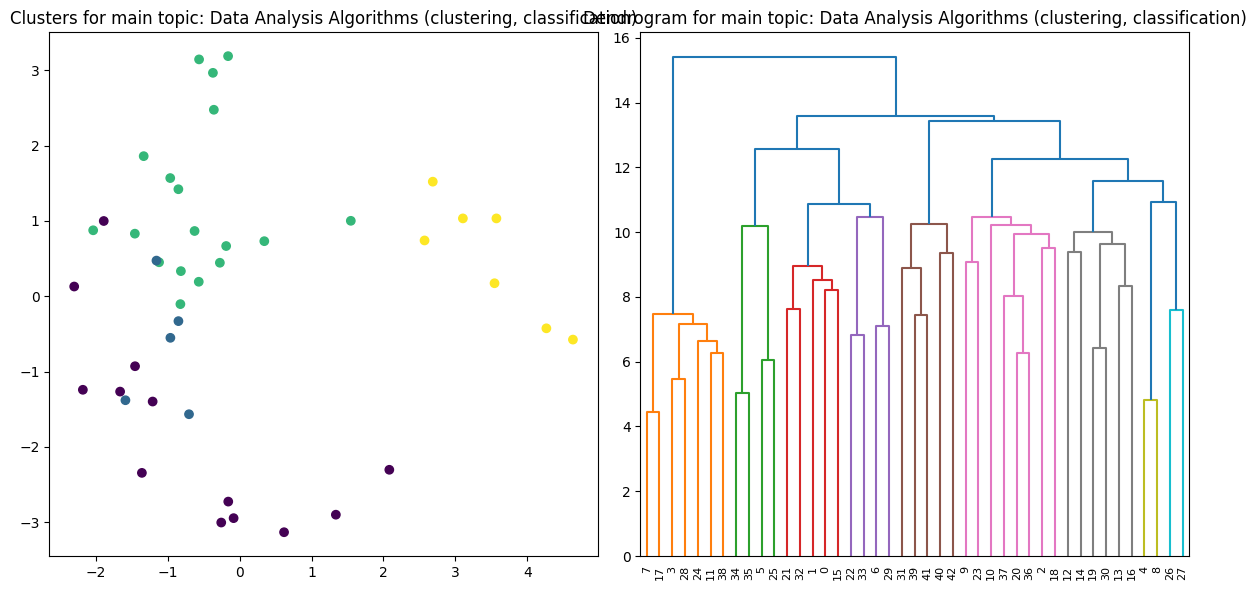

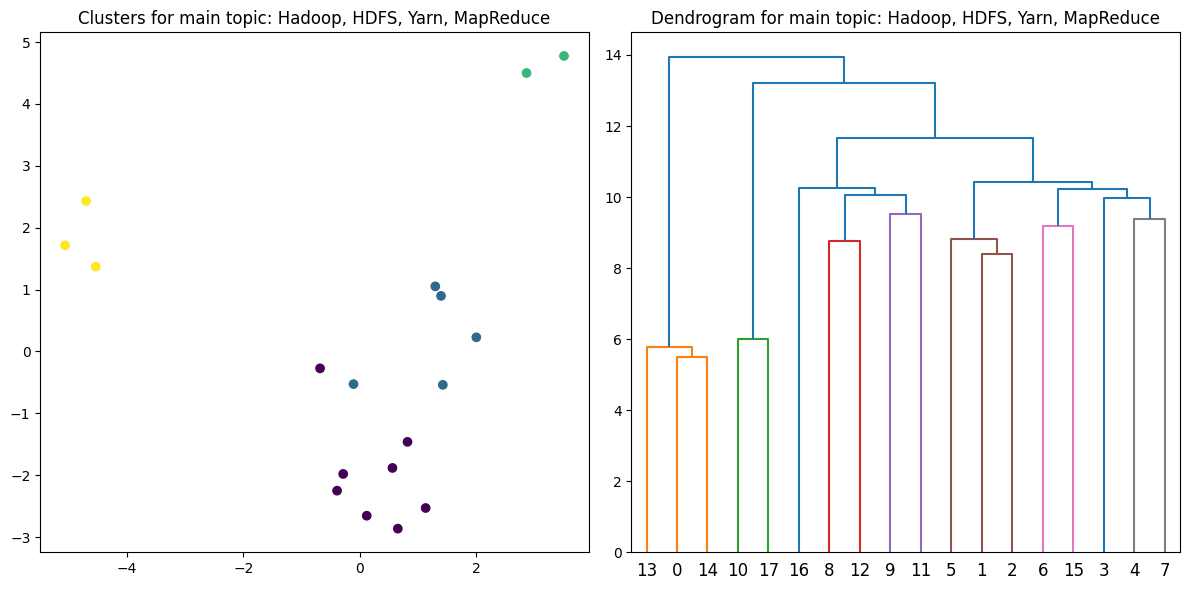

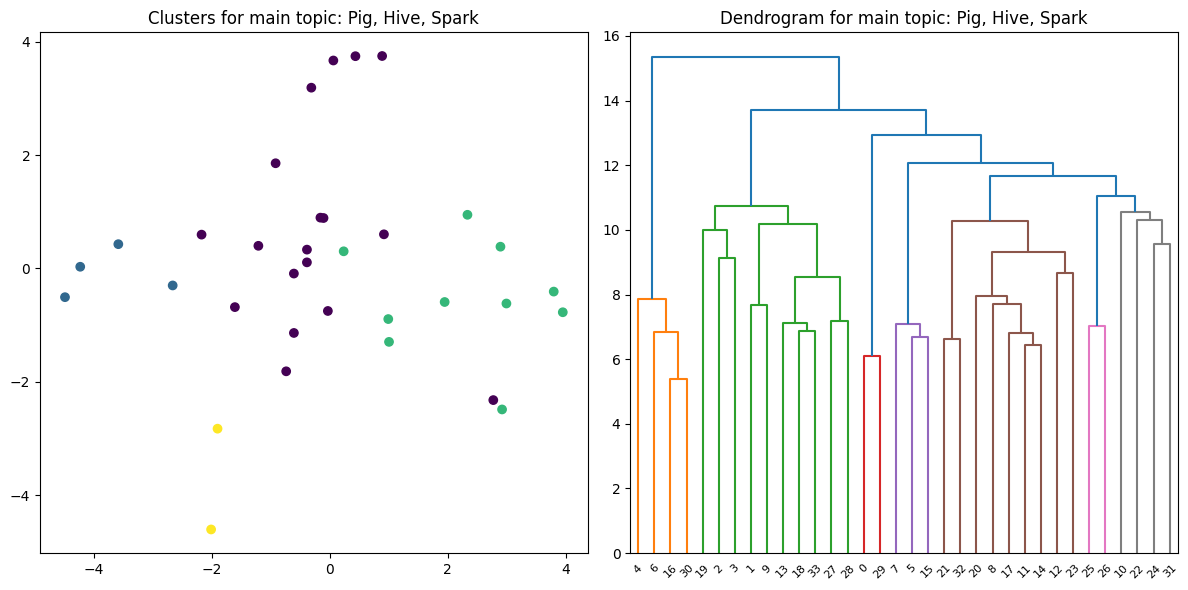

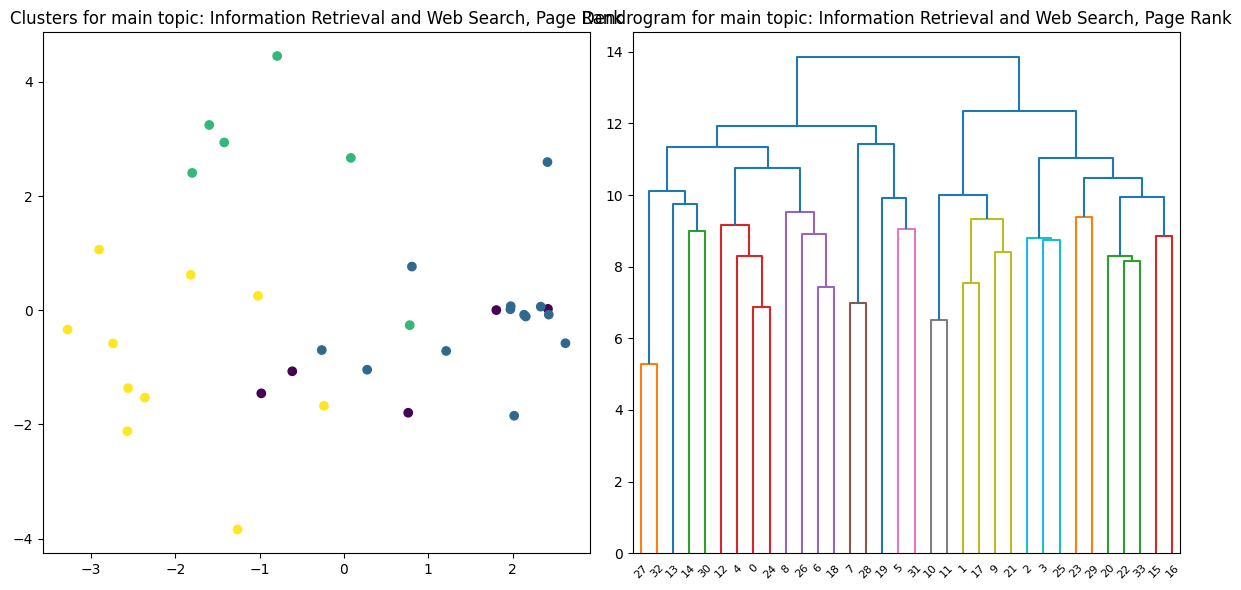

In [4]:
hadoop_extractor.visualize_hierarchy('', 'cluster map')

In [ ]:
hadoop_extractor.syllabus_pipline()

In [ ]:
from src.metrics import AnswerCorrectness
from deepeval.test_case import LLMTestCase
cloud_computing_learning_topics = ['Distributed Computing and Clouds', 'Data Analysis Algorithms', 'Hadoop', 'HDFS', 'YARN', 'MapReduce', 'Pig', 'Hive', 'Spark', 'Information Retrieval', 'Page Rank', 'Web Search']
import warnings
warnings.filterwarnings('ignore')

ac = AnswerCorrectness()
ac.measure(LLMTestCase('No input given.', ' '.join(hadoop_extractor.main_topics), ' '.join(cloud_computing_learning_topics)))

print('actual:', hadoop_extractor.main_topics)
print('expected:', cloud_computing_learning_topics)
print(ac.score)
print(ac.reason)

In [ ]:
topics = hadoop_extractor.identify_main_topics()
topics

- identify main topics from syllabus (done)
- identify course objectives from syllabus
- identify learning concepts from textbook (done)
- 

In [ ]:
relations = hadoop_extractor.identify_main_topic_relations()

In [ ]:
hadoop_extractor.draw_graph(relations)

## 